<a href="https://colab.research.google.com/github/Danielbrgs/biblioteca_pandas/blob/main/Case2_Varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

In [5]:
vendas = pd.read_excel('/content/varejo.xlsx')
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [6]:
vendas.groupby("idcanalvenda").idcompra.nunique().reset_index()

,idcanalvenda,idcompra
0,APP,139
1,Aplicativo,21425
2,Internet,24515
3,Mobile,24732


In [7]:
vendas.groupby("Nome_Departamento").idcompra.nunique().reset_index()

,Nome_Departamento,idcompra
0,Acessorios e Inovacoes,3548
1,Alimentos,2
2,Ar e Ventilacao,951
3,Audio,1794
4,Automotivo,895
5,Bebes,4531
6,Beleza e Saude,4626
7,Brinquedos,1320
8,"Cama, Mesa e Banho",153
9,Casa e Construcao,263


In [8]:
vendas["Nome_Departamento"]=vendas["Nome_Departamento"].str.replace("TV_e_Video","TVs_e_Acessorios")


In [9]:
vendas["idcanalvenda"]=vendas["idcanalvenda"].str.replace("APP","Aplicativo")
print(vendas['idcanalvenda'].unique())

['Mobile' 'Aplicativo' 'Internet']


In [10]:
vendas['Preço'].isnull().reset_index()

,index,Preço
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
80223,80223,False
80224,80224,False
80225,80225,False
80226,80226,False


In [11]:
vendas

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790
...,...,...,...,...,...,...,...,...,...
80223,636930,Aplicativo,B,2023-04-01,879.200,879.200,Telefones e Celulares,RJ,15746
80224,658550,Aplicativo,B,2023-02-18,879.200,879.200,Telefones e Celulares,AM,443
80225,680170,Aplicativo,B,2023-01-22,879.200,879.200,Telefones e Celulares,PB,9349
80226,701790,Aplicativo,B,2023-02-11,879.200,879.200,Telefones e Celulares,PB,10944


In [12]:
vendas[vendas['estado'].isnull()]
vendas_semnulos=vendas.dropna() # apaga todos os nulos
vendas_semnulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [13]:
vendas["estado"].fillna("BR",inplace=True)
# O inplace faz com que a linha seja mais simples, ja substituindo o valor de vendas
# É a mesma coisa que escrever o código assim:
vendas['estado'] = vendas['estado'].fillna('MS')

vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [14]:
vendas['Frete']=vendas["Preço_com_frete"]-vendas["Preço"]

In [15]:
vendas[vendas['Frete']==0]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Frete
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590,0.0
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933,0.0
5,456225,Internet,A,2023-03-19,1903.200,1903.200,Telefones e Celulares,SP,23742,0.0
6,464255,Internet,A,2023-01-02,599.200,599.200,Eletrodomesticos,SP,5604,0.0
7,39780,Internet,B,2023-04-29,352.080,352.080,Acessorios e Inovacoes,BA,9098,0.0
...,...,...,...,...,...,...,...,...,...,...
80223,636930,Aplicativo,B,2023-04-01,879.200,879.200,Telefones e Celulares,RJ,15746,0.0
80224,658550,Aplicativo,B,2023-02-18,879.200,879.200,Telefones e Celulares,AM,443,0.0
80225,680170,Aplicativo,B,2023-01-22,879.200,879.200,Telefones e Celulares,PB,9349,0.0
80226,701790,Aplicativo,B,2023-02-11,879.200,879.200,Telefones e Celulares,PB,10944,0.0


In [16]:
vendas["Preço"].fillna(vendas["Preço_com_frete"],inplace = True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
 9   Frete              79926 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 6.1+ MB


In [17]:
vendas[['Preço','Preço_com_frete']].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.516482,908.619823
std,1060.334728,1057.583101
min,6.320000,6.320000
25%,144.320000,150.706000
50%,531.240000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [18]:
preco_errado = vendas.query('Preço > Preço_com_frete')
preco_certo = vendas.query('Preço <= Preço_com_frete')


In [19]:
preco_certo.describe()

,idcompra,Preço,Preço_com_frete,cliente_Log,Frete
count,80085.000000,80085.000000,80085.000000,80085.000000,79783.000000
mean,251019.034713,905.380965,908.857999,13933.360455,3.490195
std,144235.787640,1057.738074,1057.710394,8065.591565,9.695656
min,0.000000,6.320000,6.320000,1.000000,0.000000
25%,126880.000000,143.992000,151.056000,6917.000000,0.000000
50%,251770.000000,531.240000,535.120000,13933.000000,0.000000
75%,375875.000000,1199.200000,1215.240000,20915.000000,1.592000
max,723410.000000,14439.240000,14439.240000,27982.000000,237.784000


In [23]:
preco_certo.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Frete
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590,0.000
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478,1.592
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933,0.000
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790,41.912
5,456225,Internet,A,2023-03-19,1903.200,1903.200,Telefones e Celulares,SP,23742,0.000


In [25]:
preco_certo.query("Nome_Departamento == 'Esporte e Lazer' and estado == 'SP'").describe()

,idcompra,Preço,Preço_com_frete,cliente_Log,Frete
count,191.000000,191.00000,191.000000,191.000000,191.000000
mean,272904.240838,1010.24356,1035.426052,14317.968586,25.182492
std,140870.980710,620.36360,625.940788,7852.326225,18.402282
min,2145.000000,10.89600,16.112000,210.000000,0.000000
25%,162705.000000,519.20000,523.200000,7699.000000,14.436000
50%,263305.000000,1039.20000,1060.392000,15256.000000,24.520000
75%,392710.000000,1471.20000,1499.124000,20637.000000,31.920000
max,497570.000000,2399.20000,2432.744000,27841.000000,154.216000


In [26]:
preco_certo.groupby('Nome_Departamento').idcompra.nunique().sort_values(ascending=False).reset_index()

,Nome_Departamento,idcompra
0,Telefones e Celulares,14480
1,Eletrodomesticos,10483
2,Eletroportateis,9571
3,TVs e Acessorios,5319
4,Informatica,5277
5,Beleza e Saude,4618
6,Bebes,4523
7,Moveis,4171
8,Utilidades Domesticas,3714
9,Acessorios e Inovacoes,3545


In [27]:
round(preco_certo.groupby('Nome_Departamento')["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)

,Nome_Departamento,Preço_com_frete
0,TV e Video,9847.26
1,TVs e Acessorios,2058.70
2,Informatica,2017.19
3,Linha Industrial,1668.68
4,Cine e Foto,1461.08
5,Telefones e Celulares,1419.26
6,Eletrodomesticos,1233.90
7,Esporte e Lazer,1030.68
8,Tablets,962.97
9,Instrumentos Musicais,834.61


In [29]:
preco_certo["mes"]=preco_certo["Data"].dt.month
preco_certo

<ipython-input-29-22b41a15f7a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preco_certo["mes"]=preco_certo["Data"].dt.month


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Frete,mes
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590,0.000,3
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478,1.592,3
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933,0.000,1
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790,41.912,3
5,456225,Internet,A,2023-03-19,1903.200,1903.200,Telefones e Celulares,SP,23742,0.000,3
...,...,...,...,...,...,...,...,...,...,...,...
80223,636930,Aplicativo,B,2023-04-01,879.200,879.200,Telefones e Celulares,RJ,15746,0.000,4
80224,658550,Aplicativo,B,2023-02-18,879.200,879.200,Telefones e Celulares,AM,443,0.000,2
80225,680170,Aplicativo,B,2023-01-22,879.200,879.200,Telefones e Celulares,PB,9349,0.000,1
80226,701790,Aplicativo,B,2023-02-11,879.200,879.200,Telefones e Celulares,PB,10944,0.000,2


In [30]:
preco_certo.groupby('mes').idcompra.nunique().sort_values(ascending=False).reset_index()

,mes,idcompra
0,3,19028
1,4,18345
2,1,18207
3,2,17362


In [31]:
cliente = pd.read_excel("/content/cliente_varejo.xlsx")
cliente.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [32]:
duplicatas = cliente.duplicated().reset_index()
duplicatas = duplicatas.rename(columns={0:'bool'})
duplicatas

,index,bool
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
26420,26420,False
26421,26421,False
26422,26422,False
26423,26423,False


In [33]:
duplicatas.groupby('bool').index.nunique()

bool
False    26424
True         1
Name: index, dtype: int64

In [34]:
cliente

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207
...,...,...,...
26420,20177,48,3132
26421,23977,31,5108
26422,25398,35,13136
26423,26390,50,12304


In [35]:
cliente = cliente.drop_duplicates()
cliente

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207
...,...,...,...
26420,20177,48,3132
26421,23977,31,5108
26422,25398,35,13136
26423,26390,50,12304


In [36]:
preco_certo.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Frete,mes
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590,0.000,3
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478,1.592,3
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933,0.000,1
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790,41.912,3
5,456225,Internet,A,2023-03-19,1903.200,1903.200,Telefones e Celulares,SP,23742,0.000,3


In [37]:
cliente[["idade","renda"]].describe()

,idade,renda
count,26424.000000,26424.000000
mean,53.413223,8241.258818
std,20.698939,3899.793676
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [38]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26424 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26424 non-null  int64
 1   idade        26424 non-null  int64
 2   renda        26424 non-null  int64
dtypes: int64(3)
memory usage: 825.8 KB


In [39]:
cliente = cliente.astype({'renda':'float'})

In [40]:
cliente.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
26420    False
26421    False
26422    False
26423    False
26424    False
Length: 26424, dtype: bool

In [42]:
vendas_cliente = preco_certo.merge(cliente, how='right',on='cliente_Log')
vendas_cliente.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156341 entries, 0 to 156340
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   idcompra           156341 non-null  int64         
 1   idcanalvenda       156341 non-null  object        
 2   bandeira           156341 non-null  object        
 3   Data               156341 non-null  datetime64[ns]
 4   Preço              156341 non-null  float64       
 5   Preço_com_frete    156341 non-null  float64       
 6   Nome_Departamento  156341 non-null  object        
 7   estado             156341 non-null  object        
 8   cliente_Log        156341 non-null  int64         
 9   Frete              155784 non-null  float64       
 10  mes                156341 non-null  int64         
 11  idade              156341 non-null  int64         
 12  renda              156341 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), 

In [43]:
vendas_cliente = preco_certo.merge(cliente, how='left',on='cliente_Log')
vendas_cliente.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156341 entries, 0 to 156340
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   idcompra           156341 non-null  int64         
 1   idcanalvenda       156341 non-null  object        
 2   bandeira           156341 non-null  object        
 3   Data               156341 non-null  datetime64[ns]
 4   Preço              156341 non-null  float64       
 5   Preço_com_frete    156341 non-null  float64       
 6   Nome_Departamento  156341 non-null  object        
 7   estado             156341 non-null  object        
 8   cliente_Log        156341 non-null  int64         
 9   Frete              155784 non-null  float64       
 10  mes                156341 non-null  int64         
 11  idade              156341 non-null  int64         
 12  renda              156341 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), 

In [44]:
vendas_cliente = preco_certo.merge(cliente, how='inner',on='cliente_Log')
vendas_cliente.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156341 entries, 0 to 156340
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   idcompra           156341 non-null  int64         
 1   idcanalvenda       156341 non-null  object        
 2   bandeira           156341 non-null  object        
 3   Data               156341 non-null  datetime64[ns]
 4   Preço              156341 non-null  float64       
 5   Preço_com_frete    156341 non-null  float64       
 6   Nome_Departamento  156341 non-null  object        
 7   estado             156341 non-null  object        
 8   cliente_Log        156341 non-null  int64         
 9   Frete              155784 non-null  float64       
 10  mes                156341 non-null  int64         
 11  idade              156341 non-null  int64         
 12  renda              156341 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), 

In [50]:
agg_idcanal_renda = round(vendas_cliente.groupby('idcanalvenda')['renda'].agg('mean').reset_index(),2)
agg_idcanal_renda

,idcanalvenda,renda
0,Aplicativo,8239.46
1,Internet,8235.91
2,Mobile,8233.10


In [49]:
agg_idade_bandeira = round(vendas_cliente.groupby('bandeira')['idade'].agg('mean').sort_values(ascending=False).reset_index(),2)
agg_idade_bandeira

,bandeira,idade
0,A,53.46
1,B,53.39


In [45]:
import matplotlib.pyplot as plt

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.bar(agg_idade_bandeira['bandeira'],agg_idade_bandeira['idade'],color='gray')
plt.ylabel('Média de idade',fontsize = 14)
plt.title('Idade média por Bandeira',loc='center',fontsize=18,fontweight='bold')

In [ ]:
fig = plt.figure(figsize=(7,4))
plt.bar(agg_idcanal_renda['idcanalvenda'],agg_idcanal_renda['renda'],color='yellow')
plt.ylabel('Renda',fontsize = 14)
plt.title('Renda média por Canal de Venda',loc='center',fontsize=18,fontweight='bold')

In [61]:
vendas_por_data = preco_certo.groupby('Data').idcompra.nunique().reset_index()
vendas_por_data

,Data,idcompra
0,2023-01-02,667
1,2023-01-03,607
2,2023-01-04,677
3,2023-01-05,672
4,2023-01-06,675
...,...,...
114,2023-04-26,699
115,2023-04-27,714
116,2023-04-28,651
117,2023-04-29,684


In [ ]:
fig = plt.figure(figsize=(10,8))

x=vendas_por_data['Data']
y=vendas_por_data['idcompra']

plt.plot(x,y,color='red',linewidth='2')

plt.xlabel('Data da Venda',fontsize = 14)
plt.ylabel('Quantidade de vendas',fontsize = 14)
plt.title('Vendas por Data',loc='center',fontsize=18,fontweight='bold')


In [ ]:
agg_dept_preco = round(preco_certo.groupby('Nome_Departamento')['Preço_com_frete'].agg('mean').sort_values(ascending=False).reset_index(),2)
agg_dept_preco

Text(0.5, 1.0, 'Preço médio por departamento')

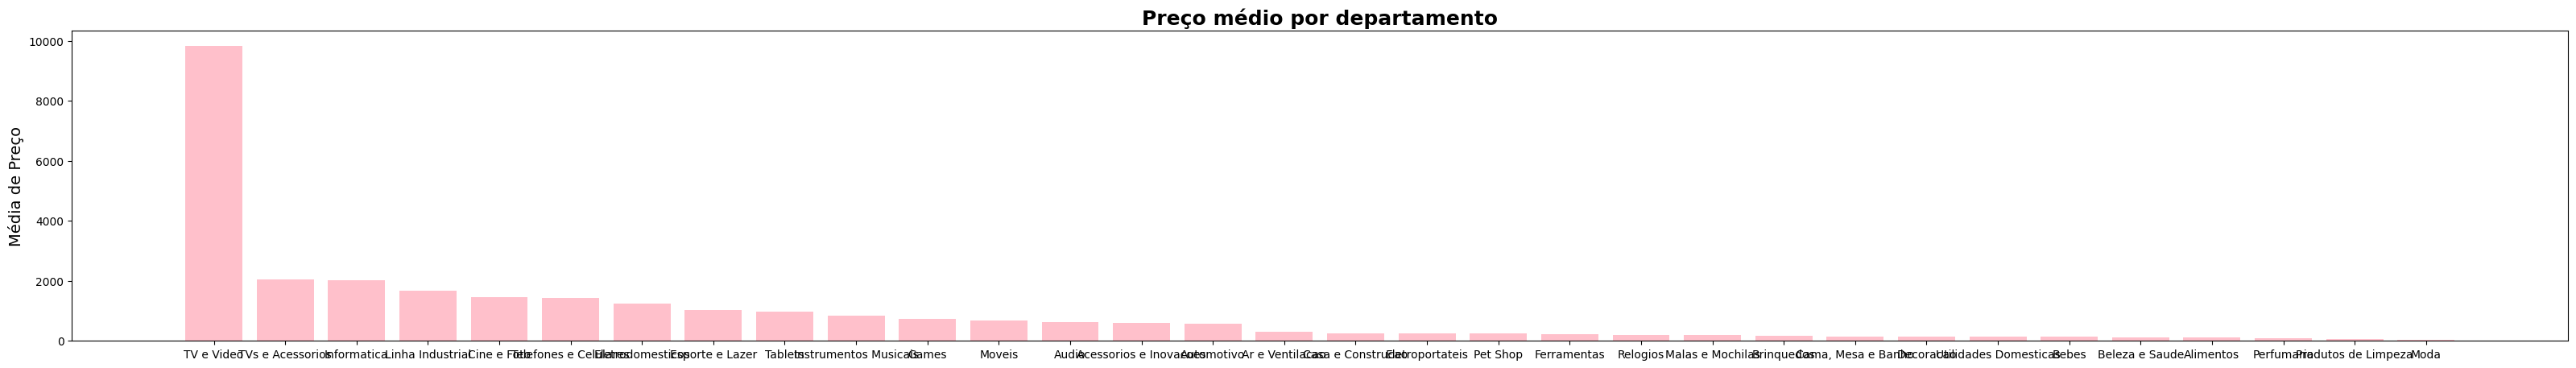

In [70]:
fig = plt.figure(figsize=(40,5))
plt.bar(agg_dept_preco['Nome_Departamento'],agg_dept_preco['Preço_com_frete'],color='pink')
plt.ylabel('Média de Preço',fontsize = 14)
plt.title('Preço médio por departamento',loc='center',fontsize=18,fontweight='bold')

In [ ]:
!pip install plotly

In [ ]:
%pip install cufflinks

In [ ]:
%pip install chart-studio

In [75]:
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [86]:
px.bar(agg_idade_bandeira, x='bandeira',y='idade')

In [80]:
venda_por_data=venda_por_data.reset_index()

In [87]:
px.line(venda_por_data,x='Data',y='idcompra')

In [84]:
px.bar(agg_dept_preco,x='Nome_Departamento',y='Preço_com_frete')